In [15]:
# Logistics:

In [2]:
import parliamentarch
import ipywidgets as widgets

In [3]:
from IPython.display import SVG, display
def show_svg(svg_string):
    display(SVG(svg_string))

In [4]:
import hashlib

def color_hash(string: str):
    return "#" + hashlib.sha256(string.encode('utf-8')).hexdigest()[:6].upper()

In [5]:
class DefaultColorDict(dict):
    def __missing__(self, key):
        value = color_hash(key)
        # insert value into dict and return value
        self[key] = value
        return value

In [6]:
party_colors = DefaultColorDict(
{
    'PvdA-GL': 'red',
    'D66': 'green',
    'CDA': 'black',
    'VVD': 'blue',
    'SGP': 'orange',
    'DENK': 'cyan',
    'Volt': 'purple',
    'rest': '#ccc',
})

In [7]:
def display_seats(seats: tuple[str, int]):
    attrib = {parliamentarch.SeatData(name, party_colors[name]): number for name, number in seats}
    svg = parliamentarch.get_svg_from_attribution(attrib)
    show_svg(svg)

In [14]:
# Main app:

In [8]:
tweede_kamer_seats = [
    ["PVV", 37],
    ["VVD", 24],
    ["NSC", 20],
    ["BBB", 7],
    ["PvdA-GL", 25],
    ["D66", 9],
    ["CDA", 5],
    ["SP", 5],
    ["FvD", 3],
    ["DENK", 3],
    ["PvdD", 3],
    ["SGP", 3],
    ["CU", 3],
    ["Volt", 2],
    ["JA21", 1],
    ["50PLUS", 0],
]

In [13]:
tweede_kamer_selectie = {"rest": 150}

output = widgets.Output()

def on_tweede_kamer_change(change):
    output.outputs = []
    owner = change["owner"]
    rest_oud = tweede_kamer_selectie.pop('rest')
    if change["new"]:
        tweede_kamer_selectie[owner.party_name] = owner.seats
        tweede_kamer_selectie['rest'] = rest_oud - owner.seats
    else:
        tweede_kamer_selectie.pop(owner.party_name)
        tweede_kamer_selectie['rest'] = rest_oud + owner.seats

    with output:
        display_seats(list(tweede_kamer_selectie.items()))

print("Tweede Kamer")

tweede_kamer_checkboxes = []
for party_name, seats in tweede_kamer_seats:
    widget = widgets.Checkbox(
        value=False,
        description=f"{party_name} ({seats} zetels)",
        disabled=False,
        indent=False
    )
    widget.party_name = party_name
    widget.seats = seats
    display(widget)
    widget.observe(on_tweede_kamer_change, names='value')
    tweede_kamer_checkboxes.append(widget)

with output:
    display_seats(list(tweede_kamer_selectie.items()))

display(output)

Tweede Kamer


Checkbox(value=False, description='PVV (37 zetels)', indent=False)

Checkbox(value=False, description='VVD (24 zetels)', indent=False)

Checkbox(value=False, description='NSC (20 zetels)', indent=False)

Checkbox(value=False, description='BBB (7 zetels)', indent=False)

Checkbox(value=False, description='PvdA-GL (25 zetels)', indent=False)

Checkbox(value=False, description='D66 (9 zetels)', indent=False)

Checkbox(value=False, description='CDA (5 zetels)', indent=False)

Checkbox(value=False, description='SP (5 zetels)', indent=False)

Checkbox(value=False, description='FvD (3 zetels)', indent=False)

Checkbox(value=False, description='DENK (3 zetels)', indent=False)

Checkbox(value=False, description='PvdD (3 zetels)', indent=False)

Checkbox(value=False, description='SGP (3 zetels)', indent=False)

Checkbox(value=False, description='CU (3 zetels)', indent=False)

Checkbox(value=False, description='Volt (2 zetels)', indent=False)

Checkbox(value=False, description='JA21 (1 zetels)', indent=False)

Checkbox(value=False, description='50PLUS (0 zetels)', indent=False)

Output()

Eerste Kamer


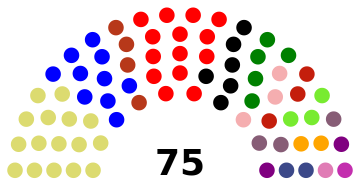

In [12]:
eerste_kamer_seats = [
    ["BBB", 16],
    ["VVD", 10],
    ["PVV", 4],
    ["PvdA-GL", 14],
    ["CDA", 6],
    ["D66", 5],
    ["SP", 3],
    ["PvdD", 3],
    ["JA21", 3],
    ["CU", 3],
    ["SGP", 2],
    ["Volt", 2],
    ["FvD", 2],
    ["50PLUS", 1],
    ["OSF/OPNL", 1],
]


Tweede Kamer


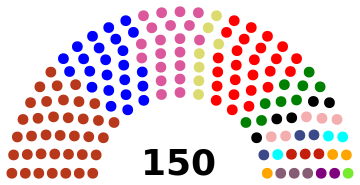

Eerste Kamer


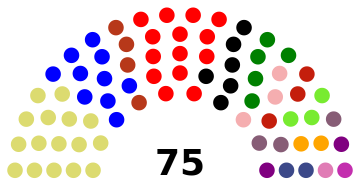

In [13]:

print("Eerste Kamer")
display_seats(eerste_kamer_seats)